# One Compartment Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# One Compartment Model
# drug / volume / k

dose = 650 # 
volume = 3000 # mL
q0 = dose/volume # drug conc in plasma
half_life = 3.2 # aspirin half-life
k = np.log(2)/half_life
# or k = np.log(0.5)/half_life?

In [3]:
t_start = 0
t_end = 10
dt = 0.1

t = np.arange(t_start, t_end, dt) # minimum unit in time (x-axis)

In [4]:
# elimination constant and drug conc in plasma
def model(k, q):
    return -k*q

In [5]:
n = int((t_end - t_start)/dt) # number of iteration
q = np.zeros(n) # [drug] in plasma
q[0] = q0 # initial [drug] in plasma

In [6]:
for i in range(n-1):
    q[i+1] = q[i] + (dt*model(k, q[i]))

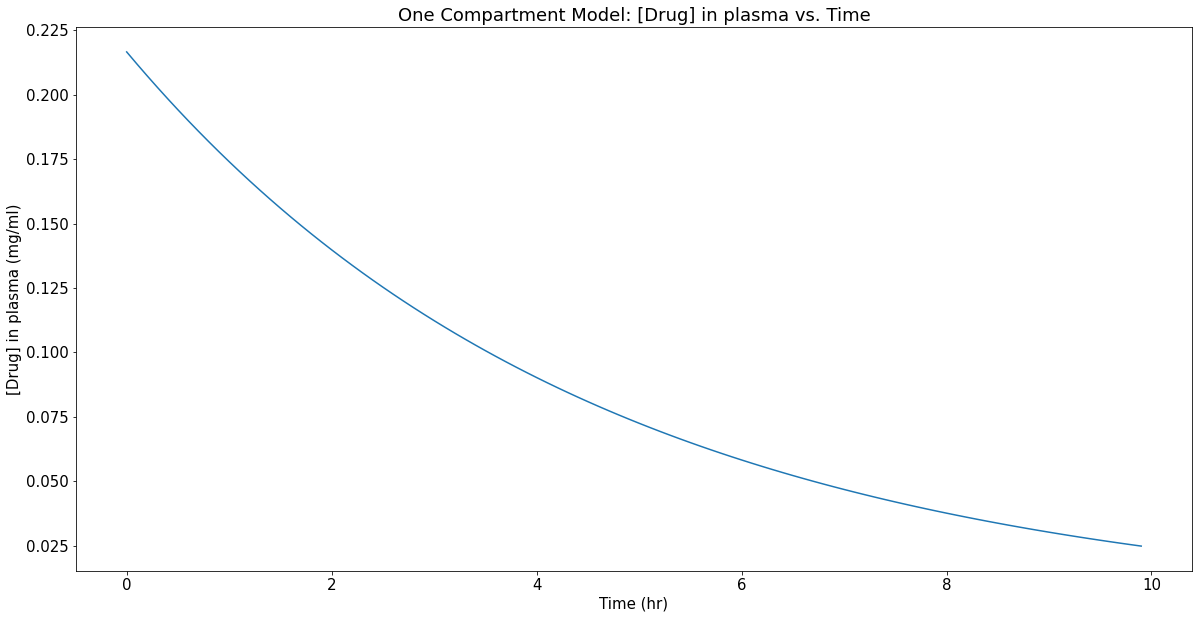

In [7]:
plt.figure(figsize = (20,10))
plt.rcParams['font.size'] = 15

plt.plot(t,q)
plt.ylabel('[Drug] in plasma (mg/ml)')
plt.xlabel('Time (hr)')
plt.title('One Compartment Model: [Drug] in plasma vs. Time')
plt.show()

# Two Compartment Model

In [8]:
## Two Compartment Model [Drug] in Compartment 1 and [Drug] in Compartment 2

def model_1(k,x):
    return -k*x

def model_2(k1,k2,x,y):
    return k1*x - k2*y

dose = 650
volume = 3000

q0 = dose/volume # concentration
k1 = 1.45
k2 = 0.145


t_start = 0
t_end = 10
dt = 0.01

In [9]:
t = np.arange(t_start, t_end, dt) # min unit in time, x-axis
n = int((t_end - t_start)/dt) # num_iter
y = np.zeros(n)
x = np.zeros(n)

In [10]:
x[0] = q0 # [drug] in compartment 1 (central)
y[0] = 0 # [drug] in compartment 2 (peripheral)

for i in range(n-1):
    x[i+1] = x[i] + (dt*model_1(k1,x[i]))
    y[i+1] = y[i] + (dt*model_2(k1, k2, x[i+1], y[i]))

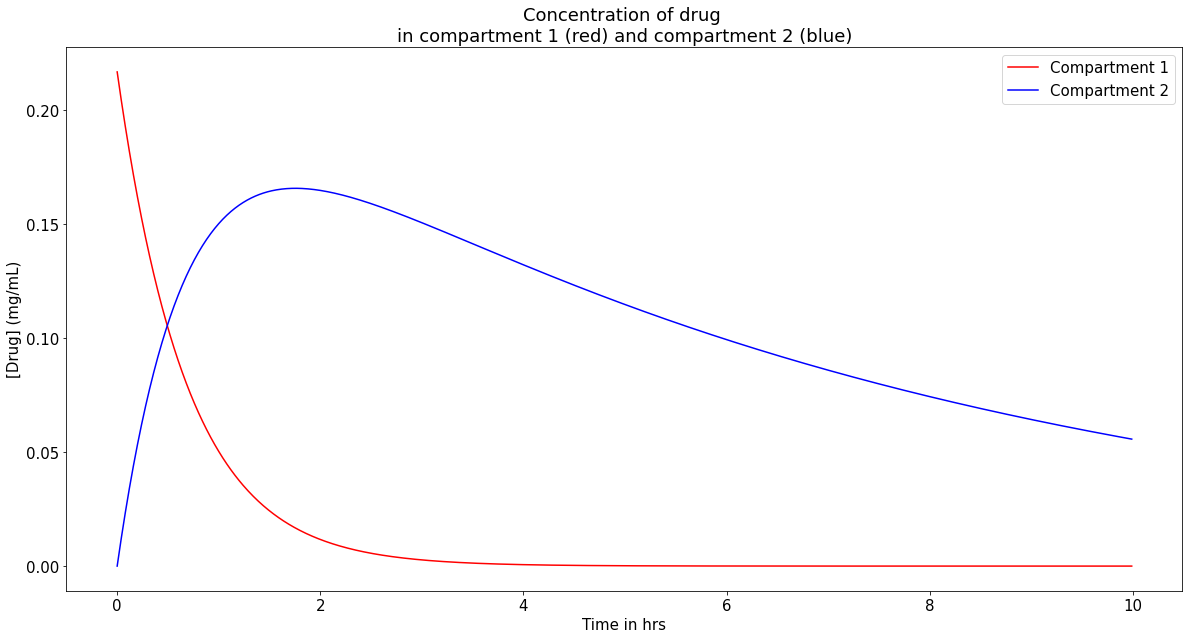

Max [Drug] in compartment 1 is  0.21666666666666667 ug/mL 
Max [Drug] in compartment 2 is  0.16563247065383926 ug/mL


In [11]:
plt.figure(figsize = (20,10))
plt.rcParams['font.size'] = 15


plt.plot(t, x, color = 'r', label = 'Compartment 1')
plt.plot(t, y, color = 'b', label = 'Compartment 2')

plt.ylabel('[Drug] (mg/mL)')
plt.xlabel('Time in hrs')
plt.title('Concentration of drug \nin compartment 1 (red) and compartment 2 (blue)')
plt.legend()
plt.show()

print('Max [Drug] in compartment 1 is ', str(np.max(x)), 'ug/mL',
      '\nMax [Drug] in compartment 2 is ', str(np.max(y)), 'ug/mL')

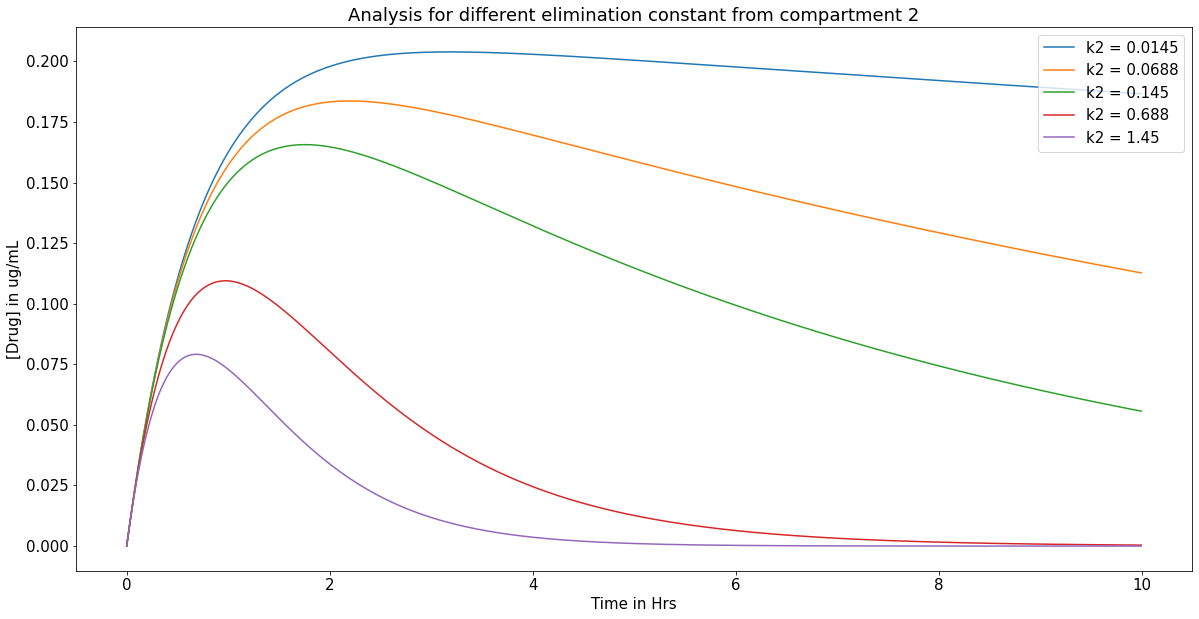

In [12]:
## Analysis of different rate of elimination constant from compartment 2
## k1 from compartment 1, dose volume, time remains same

plt.figure(figsize = (20,10))
plt.rcParams['font.size'] = 15


k2_array = [0.0145,0.0688,0.145,0.688,1.45]

for k2 in k2_array:
    
    y = np.zeros(n)
    x = np.zeros(n)
    
    y[0] = 0 
    x[0] = q0 
    
    for i in range(n-1):
        x[i+1] = x[i] + (dt*model_1(k1,x[i]))
        y[i+1] = y[i] + (dt*model_2(k1, k2, x[i+1], y[i]))
        
        
    string = 'k2 = ' + str(k2)
    plt.plot(t,y,label = string)
    plt.ylabel('[Drug] in ug/mL')
    plt.xlabel('Time in Hrs')
    

plt.title('Analysis for different elimination constant from compartment 2')
plt.legend(loc='upper right')
plt.show()

# Two Compartment Model with dosing event

In [13]:
## Conditions
# Dose orally administered every 8 hrs

t_start = 0
t_end = 24
dt = 0.001
t = np.arange(t_start, t_end, dt) # min unit in time, x-axis


dose_interval = 8 # evid every 8 hrs
n = int((t_end - t_start)/dt) # number of iteration

dose = 650
volume = 3000
dose_conc = dose/volume

q0 = dose/volume
k1 = 1.45
k2 = 0.145


# MEC - minimum effective concentration
# MTC - minimum toxic concentration


y = np.zeros(n)
x = np.zeros(n)
x[0] = q0 # [drug] in compartment 1 (central)
y[0] = 0 # [drug] in compartment 2 (peripheral)

def model_1(k,x):
    return -k*x

def model_2(k1,k2,x,y):
    return k1*x - k2*y

for i in range(1, n):
    if t[i]%dose_interval == 0: 
        x[i] = x[i-1] + dose_conc + (dt * model_1(k1,x[i-1])) # dose_conc -> dose/volume, [drug] administered
        y[i] = y[i-1] + (dt*model_2(k1, k2, x[i], y[i-1]))
    else:
        x[i] = x[i-1] + (dt * model_1(k1,x[i-1]))
        y[i] = y[i-1] + (dt*model_2(k1, k2, x[i], y[i-1]))


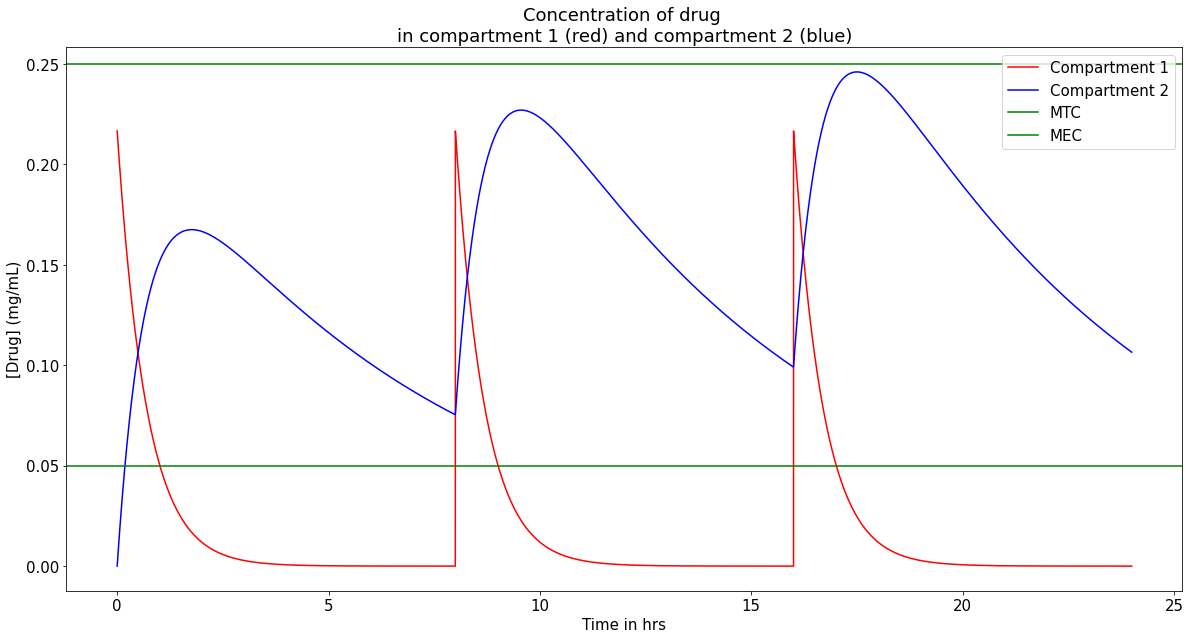

Max [Drug] in compartment 1 is  0.21666863602211162 ug/mL 
Max [Drug] in compartment 2 is  0.24608857980971302 ug/mL


In [14]:
plt.figure(figsize = (20,10))
plt.rcParams['font.size'] = 15

plt.plot(t, x, color = 'r', label = 'Compartment 1')
plt.plot(t, y, color = 'b', label = 'Compartment 2')

# MTC and MEC lines
plt.axhline(y = 0.25, xmin = t_start, xmax = t_end, color = 'g', linestyle = '-', label = 'MTC')
plt.axhline(y = 0.05, xmin = t_start, xmax = t_end, color = 'g', linestyle = '-', label = 'MEC')

plt.ylabel('[Drug] (mg/mL)')
plt.xlabel('Time in hrs')
plt.title('Concentration of drug \nin compartment 1 (red) and compartment 2 (blue)')
plt.legend()
plt.show()

print('Max [Drug] in compartment 1 is ', str(np.max(x)), 'ug/mL',
      '\nMax [Drug] in compartment 2 is ', str(np.max(y)), 'ug/mL')

# Assignment wk 10-11

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

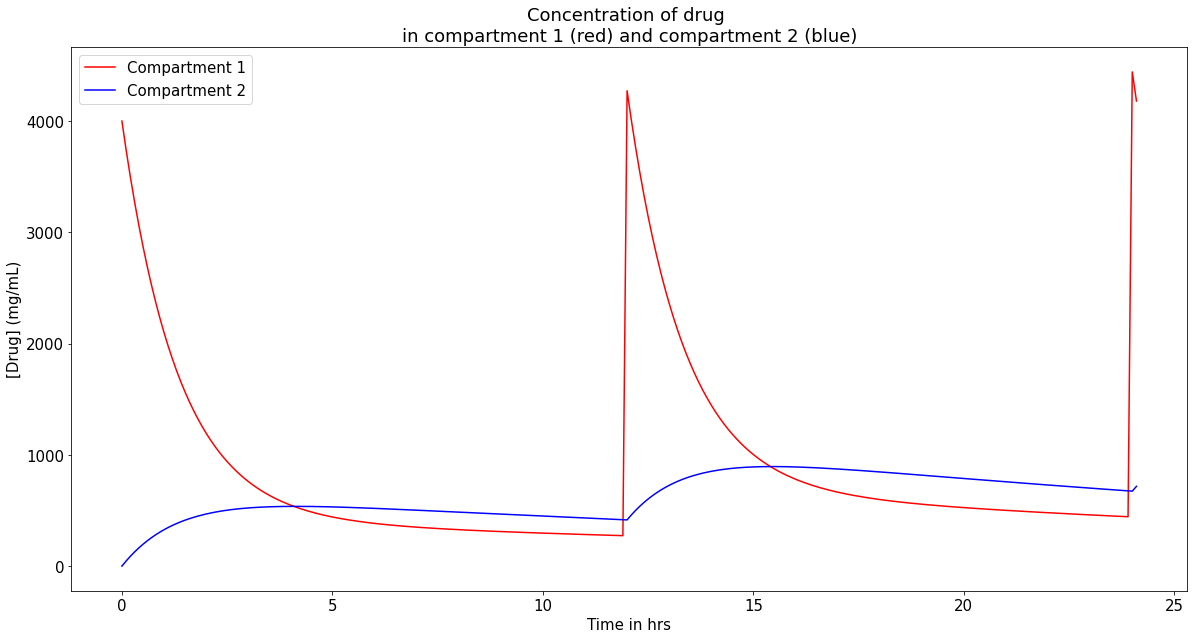

Max [Drug] in central compartment is  4441.757216729913 ug/mL 
Max [Drug] in peripheral compartment is  894.5131655328593 ug/mL


In [16]:
## The example code written without solve_ivp

#dosing_times = np.array([0, 12, 24])
#dose_amounts = np.array([80000, 80000 ,80000])

# Parameters
t_start = 0
t_end = 24.2
dt = 0.1
t = np.arange(t_start, t_end, dt) # minimum time unit
n = t.shape[0] # number of iteration
dose = 80000
dose_interval = 12

# Parameters for the model 
CL = 5 # (volume/time)
Q = 8 # (Inter-compartmental clearance (volume/time))
VC = 20 # (Central volume (volume))
VP = 70 # (Peripheral volume of distribution)

ke = CL/VC 
k12 = Q/VC
k21 = Q/VP

# Two Compartment Model re-written for hard coding
# a1 = drug conc. in compartment A1 / a2 = drug conc. in compartment A2

def model_A1(ke, k12, k21, a1, a2):
    return -ke*a1 - k12*a1 + k21*a2

def model_A2(k12, k21, a1, a2):
    return k12*a1 - k21*a2

a1 = np.zeros(n)
a1[0] = dose # initial dose
a2 = np.zeros(n)
a2[0] = 0 # initial (0) in peripheral compartment A2


# Running the models using for loop

for i in range(1, n):
    if t[i]%dose_interval == 0: 
        a1[i] = a1[i-1] + dose + (dt * model_A1(ke, k12, k21, a1[i-1], a2[i-1]))
        a2[i] = a2[i-1] + (dt * model_A2(k12, k21, a1[i-1], a2[i-1]))
    else:
        a1[i] = a1[i-1] + (dt * model_A1(ke, k12, k21, a1[i-1], a2[i-1]))
        a2[i] = a2[i-1] + (dt * model_A2(k12, k21, a1[i-1], a2[i-1]))
        
# Convert amount to conc. of Drug
q1 = a1/VC
q2 = a2/VP

# Plot
plt.figure(figsize = (20,10))
plt.rcParams['font.size'] = 15

plt.plot(t, q1, color = 'r', label = 'Compartment 1')
plt.plot(t, q2, color = 'b', label = 'Compartment 2')

plt.ylabel('[Drug] (mg/mL)')
plt.xlabel('Time in hrs')
plt.title('Concentration of drug \nin compartment 1 (red) and compartment 2 (blue)')
plt.legend()
plt.show()

print('Max [Drug] in central compartment is ', str(np.max(q1)), 'ug/mL',
      '\nMax [Drug] in peripheral compartment is ', str(np.max(q2)), 'ug/mL')

In [17]:
## Example dataset
## 10 individuals
df = pd.read_csv("AZ project/example_poppk_2cpt_data.csv")

In [18]:
# split data by individuals
for i in df.ID.unique():
    ex = df[df.ID == i]
    display(ex)

,ID,time,amt,evid,dv,cmt
0,1,0.000,80000,1,4127.793222,1
1,1,0.083,0,0,4036.533763,2
2,1,0.167,0,0,3946.228832,2
3,1,0.250,0,0,3858.983496,2
4,1,0.500,0,0,3607.679169,2
5,1,0.750,0,0,3372.740257,2
6,1,1.000,0,0,3153.101013,2
7,1,1.500,0,0,2755.801038,2
8,1,2.000,0,0,2408.562023,2
9,1,3.000,0,0,1839.830378,2


,ID,time,amt,evid,dv,cmt
54,2,0.000,80000,1,4066.002184,1
55,2,0.083,0,0,3972.831028,2
56,2,0.167,0,0,3880.710854,2
57,2,0.250,0,0,3791.785591,2
58,2,0.500,0,0,3536.062531,2
59,2,0.750,0,0,3297.585773,2
60,2,1.000,0,0,3075.192204,2
61,2,1.500,0,0,2674.389101,2
62,2,2.000,0,0,2325.824400,2
63,2,3.000,0,0,1759.063755,2


,ID,time,amt,evid,dv,cmt
108,3,0.000,80000,1,3910.774326,1
109,3,0.083,0,0,3834.640754,2
110,3,0.167,0,0,3759.098826,2
111,3,0.250,0,0,3685.918019,2
112,3,0.500,0,0,3473.990190,2
113,3,0.750,0,0,3274.247495,2
114,3,1.000,0,0,3085.989329,2
115,3,1.500,0,0,2741.323268,2
116,3,2.000,0,0,2435.152055,2
117,3,3.000,0,0,1921.576812,2


,ID,time,amt,evid,dv,cmt
162,4,0.000,80000,1,3881.466595,1
163,4,0.083,0,0,3805.713318,2
164,4,0.167,0,0,3730.552510,2
165,4,0.250,0,0,3657.744572,2
166,4,0.500,0,0,3446.917558,2
167,4,0.750,0,0,3248.242303,2
168,4,1.000,0,0,3061.018396,2
169,4,1.500,0,0,2718.322520,2
170,4,2.000,0,0,2413.993111,2
171,4,3.000,0,0,1903.733330,2


,ID,time,amt,evid,dv,cmt
216,5,0.000,80000,1,4209.779886,1
217,5,0.083,0,0,4112.463927,2
218,5,0.167,0,0,4016.265710,2
219,5,0.250,0,0,3923.423149,2
220,5,0.500,0,0,3656.544909,2
221,5,0.750,0,0,3407.820202,2
222,5,1.000,0,0,3176.014194,2
223,5,1.500,0,0,2758.633193,2
224,5,2.000,0,0,2396.102986,2
225,5,3.000,0,0,1807.709027,2


,ID,time,amt,evid,dv,cmt
270,6,0.000,80000,1,3797.355430,1
271,6,0.083,0,0,3725.462787,2
272,6,0.167,0,0,3654.089650,2
273,6,0.250,0,0,3584.909356,2
274,6,0.500,0,0,3384.348746,2
275,6,0.750,0,0,3195.008659,2
276,6,1.000,0,0,3016.261354,2
277,6,1.500,0,0,2688.207758,2
278,6,2.000,0,0,2395.833816,2
279,6,3.000,0,0,1903.024641,2


,ID,time,amt,evid,dv,cmt
324,7,0.000,80000,1,3996.794146,1
325,7,0.083,0,0,3916.029482,2
326,7,0.167,0,0,3835.953268,2
327,7,0.250,0,0,3758.438774,2
328,7,0.500,0,0,3534.298115,2
329,7,0.750,0,0,3323.524452,2
330,7,1.000,0,0,3125.320622,2
331,7,1.500,0,0,2763.668675,2
332,7,2.000,0,0,2443.865915,2
333,7,3.000,0,0,1910.997732,2


,ID,time,amt,evid,dv,cmt
378,8,0.000,80000,1,4030.369110,1
379,8,0.083,0,0,3954.591714,2
380,8,0.167,0,0,3879.351815,2
381,8,0.250,0,0,3806.413786,2
382,8,0.500,0,0,3594.902976,2
383,8,0.750,0,0,3395.145177,2
384,8,1.000,0,0,3206.487309,2
385,8,1.500,0,0,2860.038486,2
386,8,2.000,0,0,2551.022147,2
387,8,3.000,0,0,2029.546159,2


,ID,time,amt,evid,dv,cmt
432,9,0.000,80000,1,3717.790644,1
433,9,0.083,0,0,3648.002246,2
434,9,0.167,0,0,3578.706724,2
435,9,0.250,0,0,3511.529136,2
436,9,0.500,0,0,3316.710932,2
437,9,0.750,0,0,3132.701162,2
438,9,1.000,0,0,2958.900179,2
439,9,1.500,0,0,2639.690480,2
440,9,2.000,0,0,2354.917506,2
441,9,3.000,0,0,1874.222220,2


,ID,time,amt,evid,dv,cmt
486,10,0.000,80000,1,3703.036369,1
487,10,0.083,0,0,3631.464910,2
488,10,0.167,0,0,3560.439452,2
489,10,0.250,0,0,3491.624075,2
490,10,0.500,0,0,3292.281648,2
491,10,0.750,0,0,3104.320000,2
492,10,1.000,0,0,2927.089385,2
493,10,1.500,0,0,2602.405621,2
494,10,2.000,0,0,2313.737001,2
495,10,3.000,0,0,1828.908589,2


In [19]:
# each individual had a single dose given at 80,000
df[df.evid == 1]

,ID,time,amt,evid,dv,cmt
0,1,0.0,80000,1,4127.793222,1
54,2,0.0,80000,1,4066.002184,1
108,3,0.0,80000,1,3910.774326,1
162,4,0.0,80000,1,3881.466595,1
216,5,0.0,80000,1,4209.779886,1
270,6,0.0,80000,1,3797.355430,1
324,7,0.0,80000,1,3996.794146,1
378,8,0.0,80000,1,4030.369110,1
432,9,0.0,80000,1,3717.790644,1
486,10,0.0,80000,1,3703.036369,1


In [20]:
## Solve ODE using parameters from above
## For individual 1

df1 = df[df.ID == 1]
display(df1.head(), df1.tail())

,ID,time,amt,evid,dv,cmt
0,1,0.000,80000,1,4127.793222,1
1,1,0.083,0,0,4036.533763,2
2,1,0.167,0,0,3946.228832,2
3,1,0.250,0,0,3858.983496,2
4,1,0.500,0,0,3607.679169,2


,ID,time,amt,evid,dv,cmt
49,1,174.0,0,0,853.739853,2
50,1,176.0,0,0,498.156108,2
51,1,180.0,0,0,169.607583,2
52,1,186.0,0,0,33.694963,2
53,1,192.0,0,0,6.693984,2


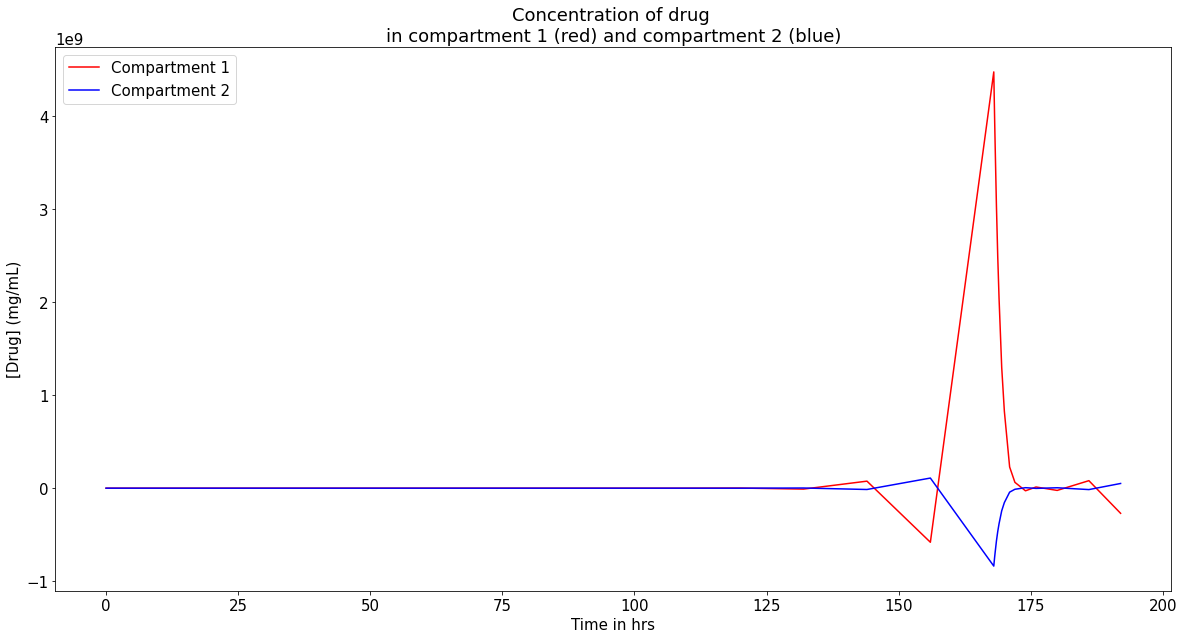

Max [Drug] in central compartment is  4473795148.160171 ug/mL 
Max [Drug] in peripheral compartment is  108772726.1597591 ug/mL


In [21]:
# Parameters
t_start = df1.time.min()
t_end = df1.time.max()
#dt = 0.1
#t = np.arange(t_start, t_end, dt) # minimum time unit
t = np.array(df1.time)

n = len(t) # number of iteration
dose = 80000
dosing_loc = df1[df1.evid == 1].index # store dosing event index from DataFrame 

# Parameters for the model 
CL = 5 
Q = 8 
VC = 20 
VP = 70 

ke = CL/VC 
k12 = Q/VC
k21 = Q/VP


def model_A1(ke, k12, k21, a1, a2):
    return -ke*a1 - k12*a1 + k21*a2

def model_A2(k12, k21, a1, a2):
    return k12*a1 - k21*a2

a1 = np.zeros(n)
a1[0] = dose # initial dose
a2 = np.zeros(n)
a2[0] = 0 # initial [Drug] in peripheral compartment A2


# Running the models using for loop

for i in range(1, n):
    dt = t[i] - t[i-1]
    if i == dosing_loc: # For future work
        a1[i] = a1[i-1] + dose + (dt * model_A1(ke, k12, k21, a1[i-1], a2[i-1]))
        a2[i] = a2[i-1] + (dt * model_A2(k12, k21, a1[i-1], a2[i-1]))

        
    else:
        a1[i] = a1[i-1] + (dt * model_A1(ke, k12, k21, a1[i-1], a2[i-1]))
        a2[i] = a2[i-1] + (dt * model_A2(k12, k21, a1[i-1], a2[i-1]))
        
# Convert amount to conc.
q1 = a1/VC
q2 = a2/VP

# Plot
plt.figure(figsize = (20,10))
plt.rcParams['font.size'] = 15

plt.plot(t, q1, color = 'r', label = 'Compartment 1')
plt.plot(t, q2, color = 'b', label = 'Compartment 2')

plt.ylabel('[Drug] (mg/mL)')
plt.xlabel('Time in hrs')
plt.title('Concentration of drug \nin compartment 1 (red) and compartment 2 (blue)')
plt.legend()
plt.show()

print('Max [Drug] in central compartment is ', str(np.max(q1)), 'ug/mL',
      '\nMax [Drug] in peripheral compartment is ', str(np.max(q2)), 'ug/mL')

In [22]:
# Changing dt to t_start, t_end

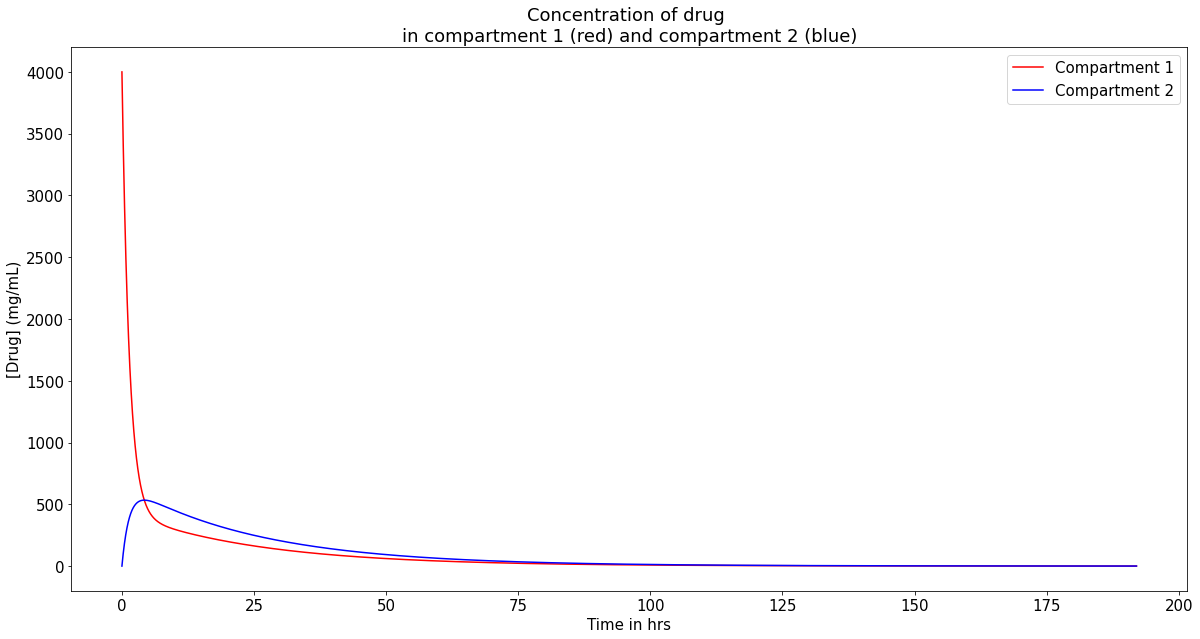

Max [Drug] in central compartment is  4000.0 ug/mL 
Max [Drug] in peripheral compartment is  533.7498718973198 ug/mL


In [23]:
# Parameters
t_start = df1.time.min()
t_end = df1.time.max()
dt = 0.01
t = np.arange(t_start, t_end, dt) # minimum time unit
#t = np.array(df1.time)

n = len(t) # number of iteration
dose = 80000
dosing_loc = df1[df1.evid == 1].index # store dosing event index from DataFrame 

# Parameters for the model 
CL = 5 
Q = 8 
VC = 20 
VP = 70 

ke = CL/VC 
k12 = Q/VC
k21 = Q/VP


def model_A1(ke, k12, k21, a1, a2):
    return -ke*a1 - k12*a1 + k21*a2

def model_A2(k12, k21, a1, a2):
    return k12*a1 - k21*a2

a1 = np.zeros(n)
a1[0] = dose # initial dose
a2 = np.zeros(n)
a2[0] = 0 # initial [Drug] in peripheral compartment A2


# Running the models using for loop

for i in range(1, n):
    dt = t[i] - t[i-1]
    if i == dosing_loc: # For future work
        a1[i] = a1[i-1] + dose + (dt * model_A1(ke, k12, k21, a1[i-1], a2[i-1]))
        a2[i] = a2[i-1] + (dt * model_A2(k12, k21, a1[i-1], a2[i-1]))

        
    else:
        a1[i] = a1[i-1] + (dt * model_A1(ke, k12, k21, a1[i-1], a2[i-1]))
        a2[i] = a2[i-1] + (dt * model_A2(k12, k21, a1[i-1], a2[i-1]))
        
# Convert amount to conc.
q1 = a1/VC
q2 = a2/VP

# Plot
plt.figure(figsize = (20,10))
plt.rcParams['font.size'] = 15

plt.plot(t, q1, color = 'r', label = 'Compartment 1')
plt.plot(t, q2, color = 'b', label = 'Compartment 2')

plt.ylabel('[Drug] (mg/mL)')
plt.xlabel('Time in hrs')
plt.title('Concentration of drug \nin compartment 1 (red) and compartment 2 (blue)')
plt.legend()
plt.show()

print('Max [Drug] in central compartment is ', str(np.max(q1)), 'ug/mL',
      '\nMax [Drug] in peripheral compartment is ', str(np.max(q2)), 'ug/mL')

In [24]:
# No luck